# Import Library

In [68]:
import os
import cv2
import math
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from glob import glob

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from keras.models import load_model

In [69]:
os.getcwd()

'/content'

# Load Data

In [70]:
dir_path = '/content/drive/MyDrive/Cloud/Training/train_clouds_data/'

In [72]:
img_dir_path = os.path.join(dir_path, 'png')

In [85]:
file_list = os.listdir(img_dir_path)
print(file_list[0])
print(len(file_list))

CLD00001_NGR_K3A_NIA0001.png
260


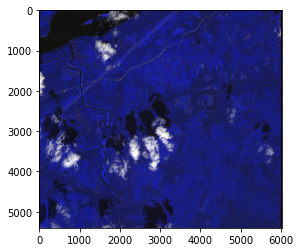

In [74]:
img_path = os.path.join(img_dir_path,file_list[0])
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

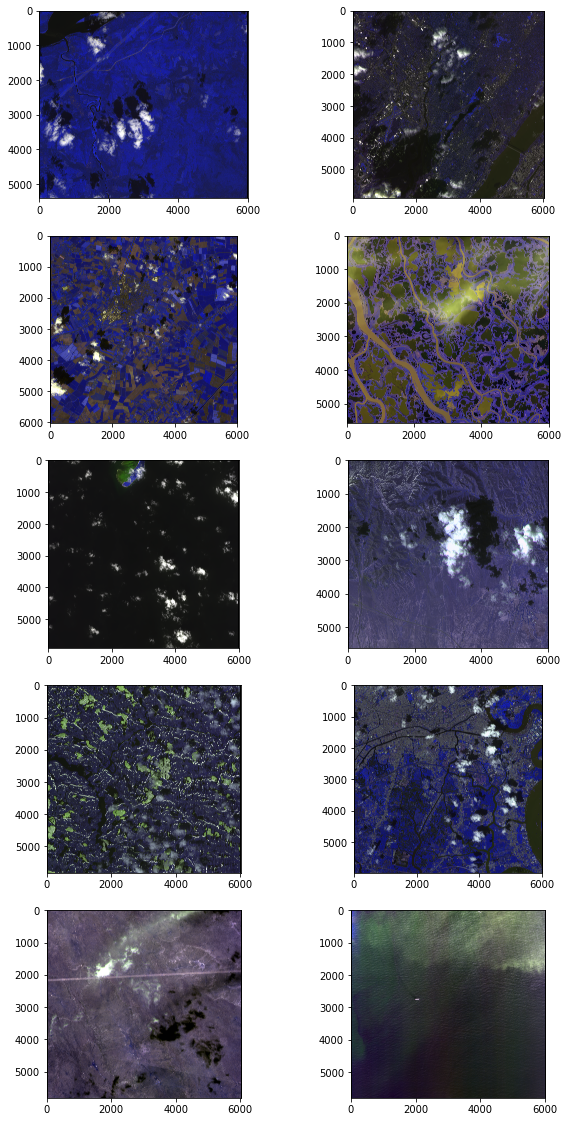

In [90]:
train_NGR_img = glob(os.path.join(img_dir_path,"*NGR*png"))
plt.figure(figsize =(10,20))
for i in range(10):
    TNGR_IMG = os.path.join(train_NGR_img[i])
    TNGR_IMG = cv2.imread(TNGR_IMG)
    plt.subplot(5,2,i+1)
    plt.imshow(TNGR_IMG)
plt.show()

In [91]:
print(TNGR_IMG)

['/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00001_NGR_K3A_NIA0001.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00003_NGR_K3A_NIA0003.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00004_NGR_K3A_NIA0004.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00005_NGR_K3A_NIA0005.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00008_NGR_K3A_NIA0008.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00011_NGR_K3A_NIA0011.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00012_NGR_K3A_NIA0012.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00013_NGR_K3A_NIA0013.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00016_NGR_K3A_NIA0016.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00017_NGR_K3A_NIA0017.png', '/content/drive/MyDrive/Cloud/Training/train_clouds_data/png/CLD00018_NGR_K3A_N

# Atrous U-net Model

In [ ]:
def Atrous_Unet_Model(input_shape = (1024,1024,3)):
    inputs = Input(input_shape)

    #Contracting Path  
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
 
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool4)  
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv5)

    # Expanding Path
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2DTranspose(512, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(drop5)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv6)
    up7 = Conv2DTranspose(256, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv7)
    up8 = Conv2DTranspose(128, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv8)
    up9 = Conv2DTranspose(64, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv9)  
    conv9 = Conv2D(2, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv9)     
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    return model